In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import functions as fs
# GradientBoostingRegressor
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold,cross_validate
from sklearn.metrics import make_scorer

plt.close('all')
##################attempt number################################
# import datafile
file_path = 'docs/Data_base.xlsx'
# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path, index_col=0)

In [17]:
element_names= df.columns.tolist()[1:36]
print('Check carefully if you collect the correct elemental features name')
print('The name of the elemental features are:',element_names)

Check carefully if you collect the correct elemental features name
The name of the elemental features are: ['Ni', 'Cr', 'Co', 'Mo', 'Ti', 'Al', 'Fe', 'Mn', 'Si', 'Ta', 'C', 'B', 'P', 'Cu', 'W', 'N', 'Nb', 'V', 'S', 'Y', 'Zr', 'Pd', 'Sc', 'Mg', 'Hf', 'Ca', 'Ce', 'Tb', 'Gd', 'Sm', 'Nd', 'La', 'Pt', 'Re', 'Sn']


In [18]:
trainset,testset = fs.data_split(df,element_names,0.2)

comp_major_low = -0.1
comp_major_high = 100.3
comp_major_inter = 10
comp_minor_low = -0.1
comp_minor_high = 50.3
comp_minor_inter = 0.1
T_low = 10
T_high = 2510
T_inter = 50
size = 8

Sampled_trainset = fs.data_sampling(trainset,comp_major_low,comp_major_high,comp_major_inter,
                                 comp_minor_low,comp_minor_high,comp_minor_inter,
                                 T_low,T_high,T_inter,size,element_names)

In [19]:
###################################################################################################################
params = {"n_estimators": 400,
    "max_depth": 3,
    "learning_rate": 0.03}

reg = ensemble.GradientBoostingRegressor(**params)#
###################################################################################################################
# Define the scoring metrics
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'R2': make_scorer(r2_score)}
# Perform five-fold cross-validation on the training set
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
###################################################################################################################

Permutation Importance ranking using Permutation Importance method on trainset
After Removed 0 Features, The performance is:
Train CV MAE Score: 0.34353028995345547 ± 0.008533159020659617
Train CV MSE Score: 0.22301721077559375 ± 0.008533159020659617
Train CV R2 Score: 0.8958734977045217 ± 0.008533159020659617
Test Score Mean Absolute Error (MAE): 0.5710514153817031
Test Score Mean Squared Error (MSE): 0.6272824292613423
Test Score R-squared (R2): 0.6987027874527485
Feature important ranking on train set: ['N' 'Pd' 'Sn' 'Re' 'Pt' 'Mg' 'V' 'Nd' 'Sm' 'Gd' 'Tb' 'Ca' 'Sc' 'P' 'S'
 'Ta' 'Mo' 'W' 'C' 'Ce' 'Cu' 'La' 'Y' 'Zr' 'Nb' 'B' 'Hf' 'Cr' 'Fe'
 'DeltaSize_HEA' 'Si' 'Hmix_HEA' 'Co' 'Smix_HEA' 'Ti' 'Electroneg_HEA'
 'Omega_HEA' 'Ni' 'Mn' 'Valence_electron_concentration_ref_Avg' 'Al'
 'Al+Cr' 'Cr/Al' 'invT']
Remove Feature for next round: N
********************************************
After Removed 1 Features, The performance is:
Train CV MAE Score: 0.34353028995345547 ± 0.00853315902065970

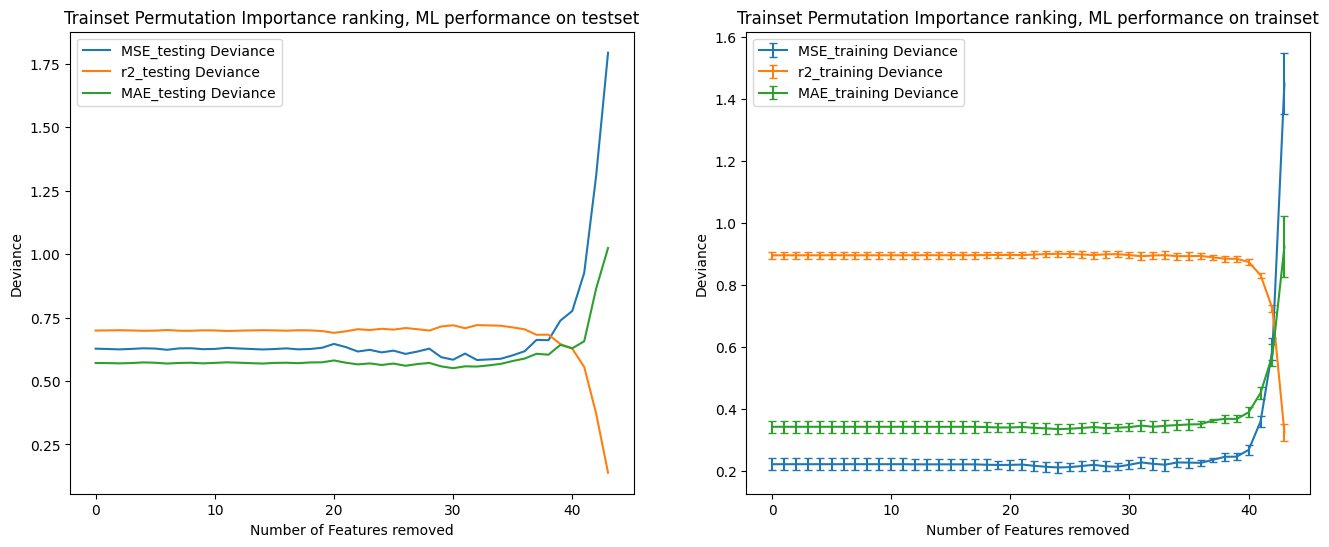

In [20]:
##############################Feature engineering Permutation Importance method###########################################################
print("Permutation Importance ranking using Permutation Importance method on trainset")
#######make a copy bf feature remove ######################################
tem_Sampled_trainset = Sampled_trainset.copy()
tem_testset = testset.copy()
#############################################################################################
Remove_feature= []
Ranking_feature =[]
Feature_score_avg =[]
Feature_score_std =[]
r2train_list = []
r2test_list = []
MSE_train_list = []
MSE_test_list = []
MAE_train_list = []
MAE_test_list = []
r2train_std_list = []
MSE_train_std_list = []
MAE_train_std_list = []
#############################################################################################
for i in range(Sampled_trainset.shape[1]-1):#
    X_train = tem_Sampled_trainset.drop(columns=['kp'])  # Exclude the target column trainset
    y_train = np.log10(tem_Sampled_trainset['kp'])#trainset
    X_test = tem_testset.drop(columns=['kp'])  # Exclude the target column
    y_test = np.log10(tem_testset['kp'])
    #####################ML fitting&predict#############################################################
    reg = ensemble.GradientBoostingRegressor(**params)#

    cv_results = cross_validate(reg, X_train, y_train, cv=kfold, scoring=scoring)

    print("After Removed",i,"Features, The performance is:")
    # Extract and print the cross-validation results
    print("Train CV MAE Score:", cv_results['test_MAE'].mean(),'±',cv_results['test_MAE'].std())
    print("Train CV MSE Score:", cv_results['test_MSE'].mean(),'±',cv_results['test_MAE'].std())
    print("Train CV R2 Score:", cv_results['test_R2'].mean(),'±',cv_results['test_MAE'].std())
    #################################################################################################################
    # Train the model using the training set
    reg.fit(X_train, y_train)
    # Make predictions on the testing data
    y_test_pred = reg.predict(X_test)
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_test_pred)
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_test_pred)
    # Calculate R-squared (R2)
    r2 = r2_score(y_test, y_test_pred)
    # Print the scores
    print("Test Score Mean Absolute Error (MAE):", mae)
    print("Test Score Mean Squared Error (MSE):", mse)
    print("Test Score R-squared (R2):", r2)
    ######################ML performance score and store it####################################################
    r2train_list.append(cv_results['test_R2'].mean())
    r2train_std_list.append(cv_results['test_R2'].std())
    r2test_list.append(r2)
    #########
    MSE_train_list.append(cv_results['test_MSE'].mean())
    MSE_train_std_list.append(cv_results['test_MSE'].std())
    MSE_test_list.append(mse)
    #########
    MAE_train_list.append(cv_results['test_MAE'].mean())
    MAE_train_std_list.append(cv_results['test_MAE'].std())
    MAE_test_list.append(mae)
    ##################ML feature importance ranking################################################
    feature_importance = permutation_importance(reg, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)
    sorted_idx = feature_importance.importances_mean.argsort()
    print("Feature important ranking on train set:",np.array(tem_Sampled_trainset.columns)[sorted_idx])
    tem_string = ', '.join(map(str, np.array(tem_Sampled_trainset.columns)[sorted_idx]))#np.sort(feature_importance)
    Ranking_feature.append(tem_string)
    column_to_remove = np.array(tem_Sampled_trainset.columns)[sorted_idx][0]
    Remove_feature.append(column_to_remove)
    tem_Sampled_trainset = tem_Sampled_trainset.drop(columns=column_to_remove)
    tem_testset = tem_testset.drop(columns=column_to_remove)
    tem_string = ', '.join(map(str, feature_importance.importances_mean[sorted_idx]))
    Feature_score_avg.append(tem_string)
    tem_string = ', '.join(map(str, feature_importance.importances_std[sorted_idx]))
    Feature_score_std.append(tem_string)
    print("Remove Feature for next round:",column_to_remove)
    print("********************************************")
##############################log the output############################################
log = {'Number of Removed Features': range(i+1),
       'r2train_avg': r2train_list,
       'r2train_std': r2train_std_list,
       'r2test': r2test_list,
       'MSE_train_avg': MSE_train_list,
       'MSE_train_std': MSE_train_std_list,
       'MSE_test': MSE_test_list,
       'MAE_train_avg': MAE_train_list,
       'MAE_train_std': MAE_train_std_list,
       'MAE_test': MAE_test_list,
       'Feature ranking': Ranking_feature,
       'Mean PER Feature ranking score':Feature_score_avg,
       'Std PER Feature ranking score':Feature_score_std,
       'Next round drop feature':Remove_feature}
log = pd.DataFrame(log)
#########################original log provided in docs, uncommon if want to save #######################
# logfile_path = 'FeatureEngineering_outputlog.xlsx'
# # Open the Excel file for writing
# with pd.ExcelWriter(logfile_path, engine='xlsxwriter') as writer:
#     # Write the DataFrame to a sheet named 'A'
#     log.to_excel(writer, sheet_name='TrainsetPermutationImportance', index=False)
##############################plot############################################
fig = plt.figure(figsize=(16, 6))
fig = plt.subplot(1, 2, 1)
plt.title("Trainset Permutation Importance ranking, ML performance on testset")
plt.plot(np.arange(i+1),
    MSE_test_list,label="MSE_testing Deviance",)
plt.plot(np.arange(i+1),
    r2test_list,label="r2_testing Deviance",)
plt.plot(np.arange(i+1),
    MAE_test_list,label="MAE_testing Deviance",)
plt.legend()#loc="upper right"
plt.xlabel("Number of Features removed")
plt.ylabel("Deviance")
# fig.tight_layout()
fig = plt.subplot(1, 2, 2)
plt.title("Trainset Permutation Importance ranking, ML performance on trainset")
plt.errorbar(np.arange(i+1), MSE_train_list, yerr=MSE_train_std_list,capsize=3, label='MSE_training Deviance')
plt.errorbar(np.arange(i+1), r2train_list, yerr=r2train_std_list,capsize=3, label='r2_training Deviance')
plt.errorbar(np.arange(i+1), MAE_train_list, yerr=MSE_train_std_list,capsize=3, label='MAE_training Deviance')
plt.legend()#loc="upper right"
plt.xlabel("Number of Features removed")
plt.ylabel("Deviance")
######################## uncommon if want to save image#######################
# plt.savefig('FeaturesEngineeringResult.png')
plt.show()